<a href="https://colab.research.google.com/github/Firizki17/Pengolahan-Citra-Digital/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

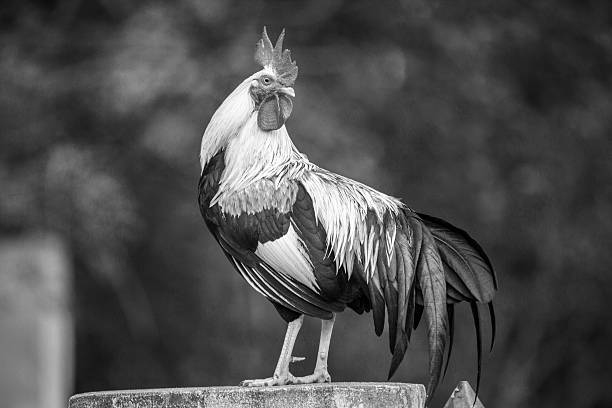

In [3]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

url = 'https://media.istockphoto.com/id/496280064/id/foto/ayam-jago.jpg?s=612x612&w=0&k=20&c=lBClGxq9bJkdiQrznan442zwk4hCmByv7nVlymPZaW8='

resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

cv2_imshow(img)


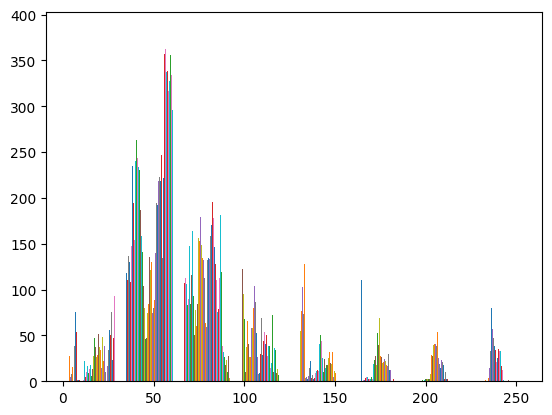

In [4]:
x = img
plt.hist(x, bins=8)
plt.show()

In [5]:
img.shape

(408, 612)

# Discontinuity Approach: Edge Detection

In [6]:
smoothing = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]])

sharpening = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

filter1 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

filter2 = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

filter3 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

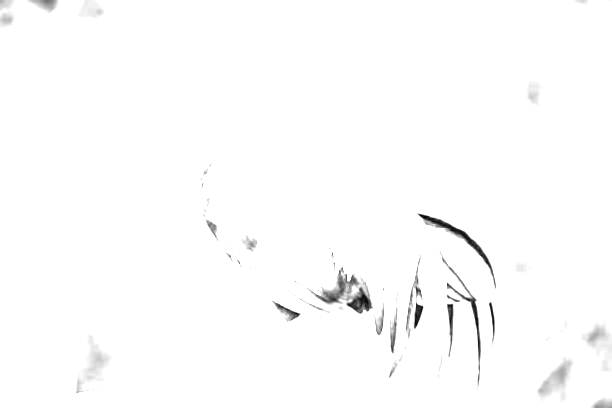

In [7]:
# smoothing
smooth_img = cv2.filter2D(img, ddepth=-1, kernel=smoothing)
cv2_imshow(smooth_img)

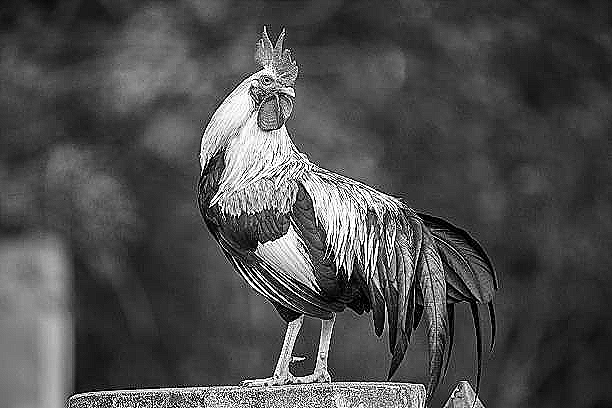

In [8]:
# Sharpening
sharp_img = cv2.filter2D(img, ddepth=-1, kernel=sharpening)
cv2_imshow(sharp_img)

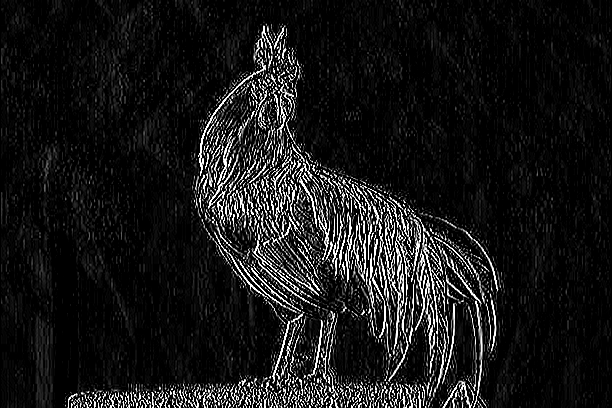

In [9]:
# Sobel Filter
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter1)
cv2_imshow(edge_img)

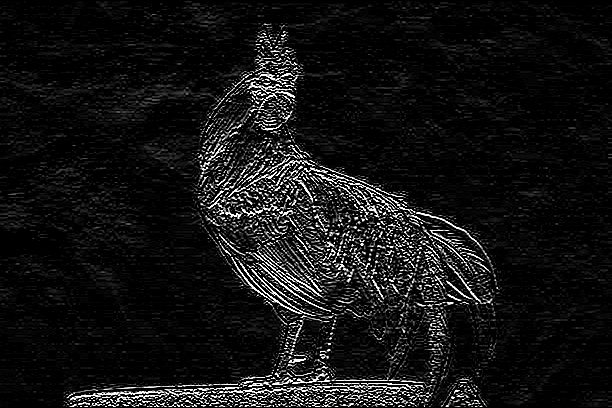

In [10]:
# Sobel Filter
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter2)
cv2_imshow(edge_img)

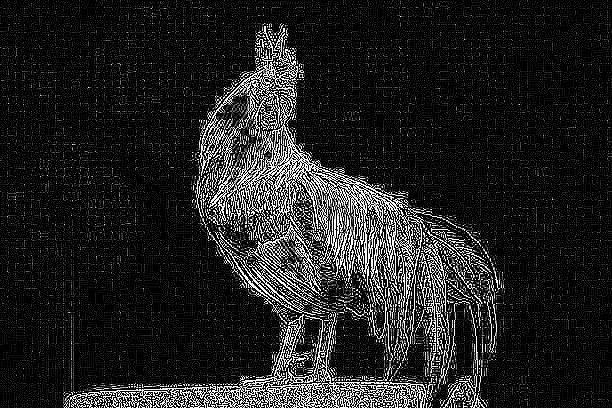

In [11]:
# Edge Detection
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter3)
cv2_imshow(edge_img)

## Algoritma Canny

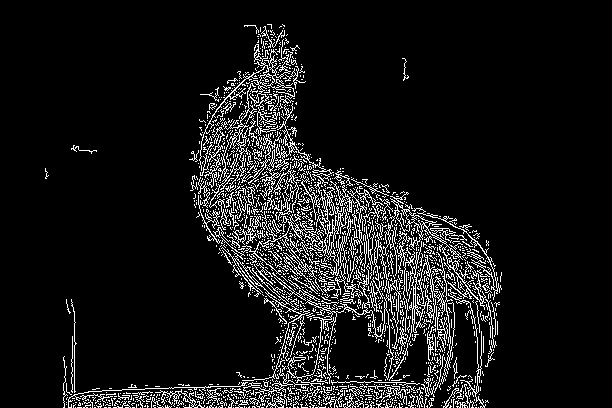

In [12]:
# Canny
edge_img = cv2.Canny(sharp_img, 50, 170)
cv2_imshow(edge_img)

Canny Edge Detection memiliki sejumlah kelebihan yang menjadikannya algoritma unggulan untuk deteksi tepi. Algoritma ini mampu mendeteksi tepi dengan akurasi tinggi, menghasilkan garis tepi yang tipis dan terlokalisasi dengan baik. Dengan adanya Gaussian Smoothing pada langkah awal, algoritma ini efektif dalam mengurangi noise pada gambar, sehingga mampu mencegah deteksi tepi palsu. Selain itu, stabilitas deteksi ditingkatkan melalui penggunaan threshold ganda, di mana tepi yang lemah hanya dianggap valid jika terhubung dengan tepi yang kuat. Kombinasi langkah-langkah ini menjadikan algoritma Canny andal untuk berbagai aplikasi, seperti pengenalan objek dan segmentasi gambar.

Selanjutnya, hasil edge detection bisa kita implementasikan untuk kasus AI, seperti object detection.

# Similar Approach: Clustering with K-Means

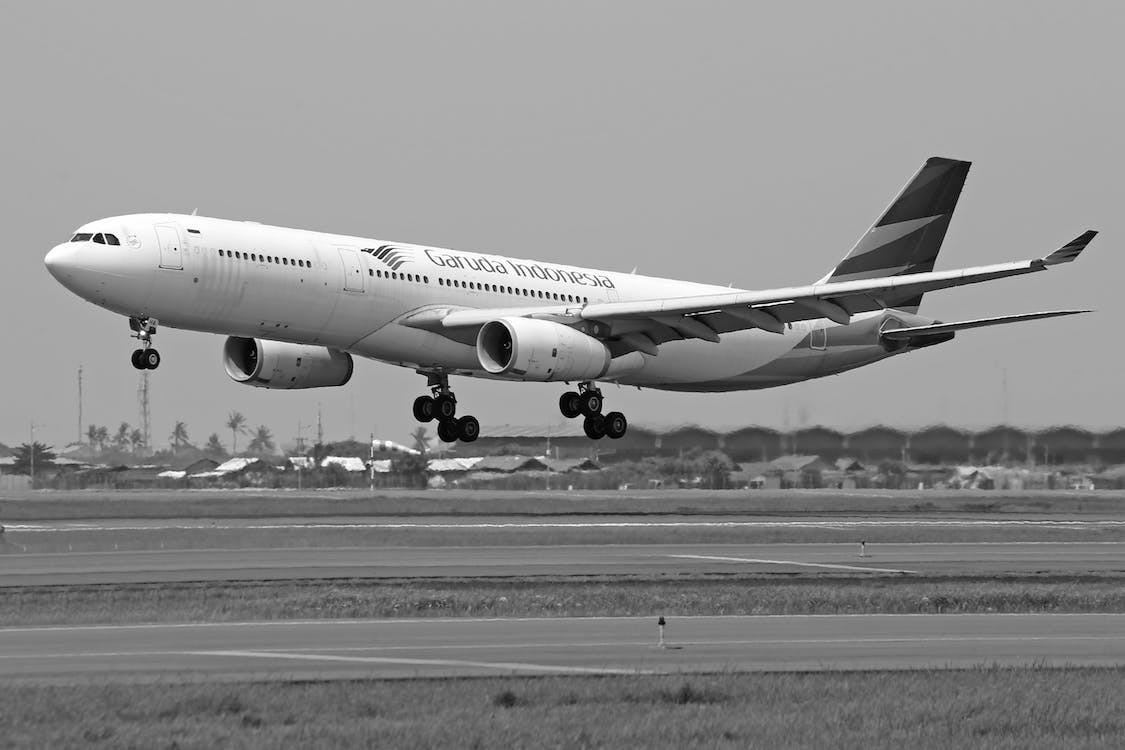

In [13]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

url = 'https://img.okezone.com/content/2024/03/04/406/2978883/10-fakta-menarik-pesawat-jarang-diketahui-punya-klakson-hingga-dirancang-antipetir-DhMgBTKmC0.jpeg'

resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

cv2_imshow(img)


In [14]:
# Reshaping image menjadi array 2D: pixel & channel
nilai_pixel = img.reshape((-1,3))

# Ubah menjadi float
nilai_pixel = np.float32(nilai_pixel)

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Definisikan kriteria clustering, akan berhenti jika
# - iterasi mencapai 100
# - akurasi 85%

In [16]:
# Melakukan clustering dengan jumlah cluster = 3
k = 4
retval, labels, centers = cv2.kmeans(nilai_pixel, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# labels = label tiap pixel
# centers = centroid

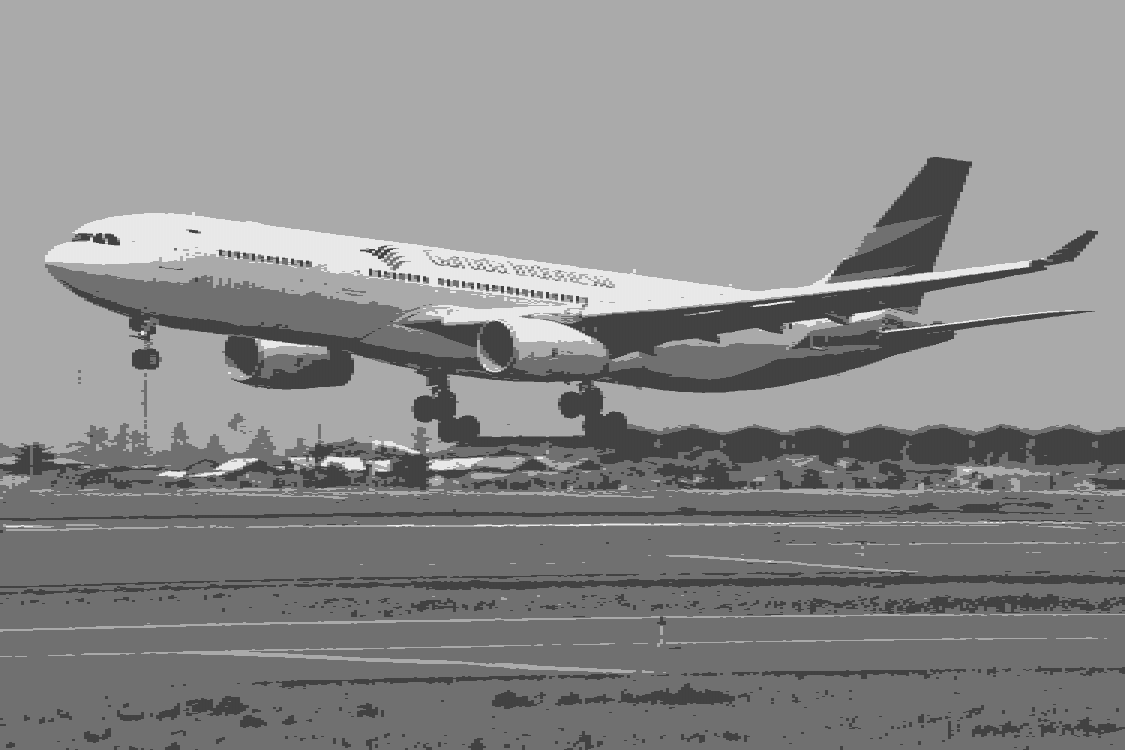

In [17]:
# ubah centroid menjadi int karena image perlu nilai int
centers = np.uint8(centers)

# tetapkan centroid ke tiap label pixel
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))
cv2_imshow(segmented_image)

Program ini menghasilkan gambar yang telah disederhanakan warnanya menjadi 4 kelompok warna utama. Proses ini sering digunakan untuk segmentasi gambar atau untuk mengurangi kompleksitas warna dalam pengolahan citra.